In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Kode ini mengimpor library yang umum digunakan dalam analisis data: **pandas** untuk manipulasi data, **numpy** untuk operasi numerik, **matplotlib.pyplot** untuk membuat grafik, dan **seaborn** untuk visualisasi data yang estetis dan statistik.


In [ ]:
# Load dataset
data = pd.read_csv("D:\\KULIAH\\SEMESTER 7\\MACHINE LEARNING\RegresiUTSTelkom.csv")

# # Rename columns to x1, x2, ..., x91
column_names = [f'x{i}' for i in range(1, data.shape[1] + 1)]
data.columns = column_names

Memuat dataset dan mengganti nama kolom agar lebih mudah diakses atau sesuai dengan format tertentu.

Korelasi rata-rata tiap kolom (descending):
x20    0.092267
x16    0.091248
x17    0.090917
x24    0.090187
x19    0.088300
         ...   
x76   -0.026280
x40   -0.027099
x36   -0.029445
x80   -0.044760
x2    -0.050470
Length: 91, dtype: float64

Target terbaik berdasarkan korelasi: x16


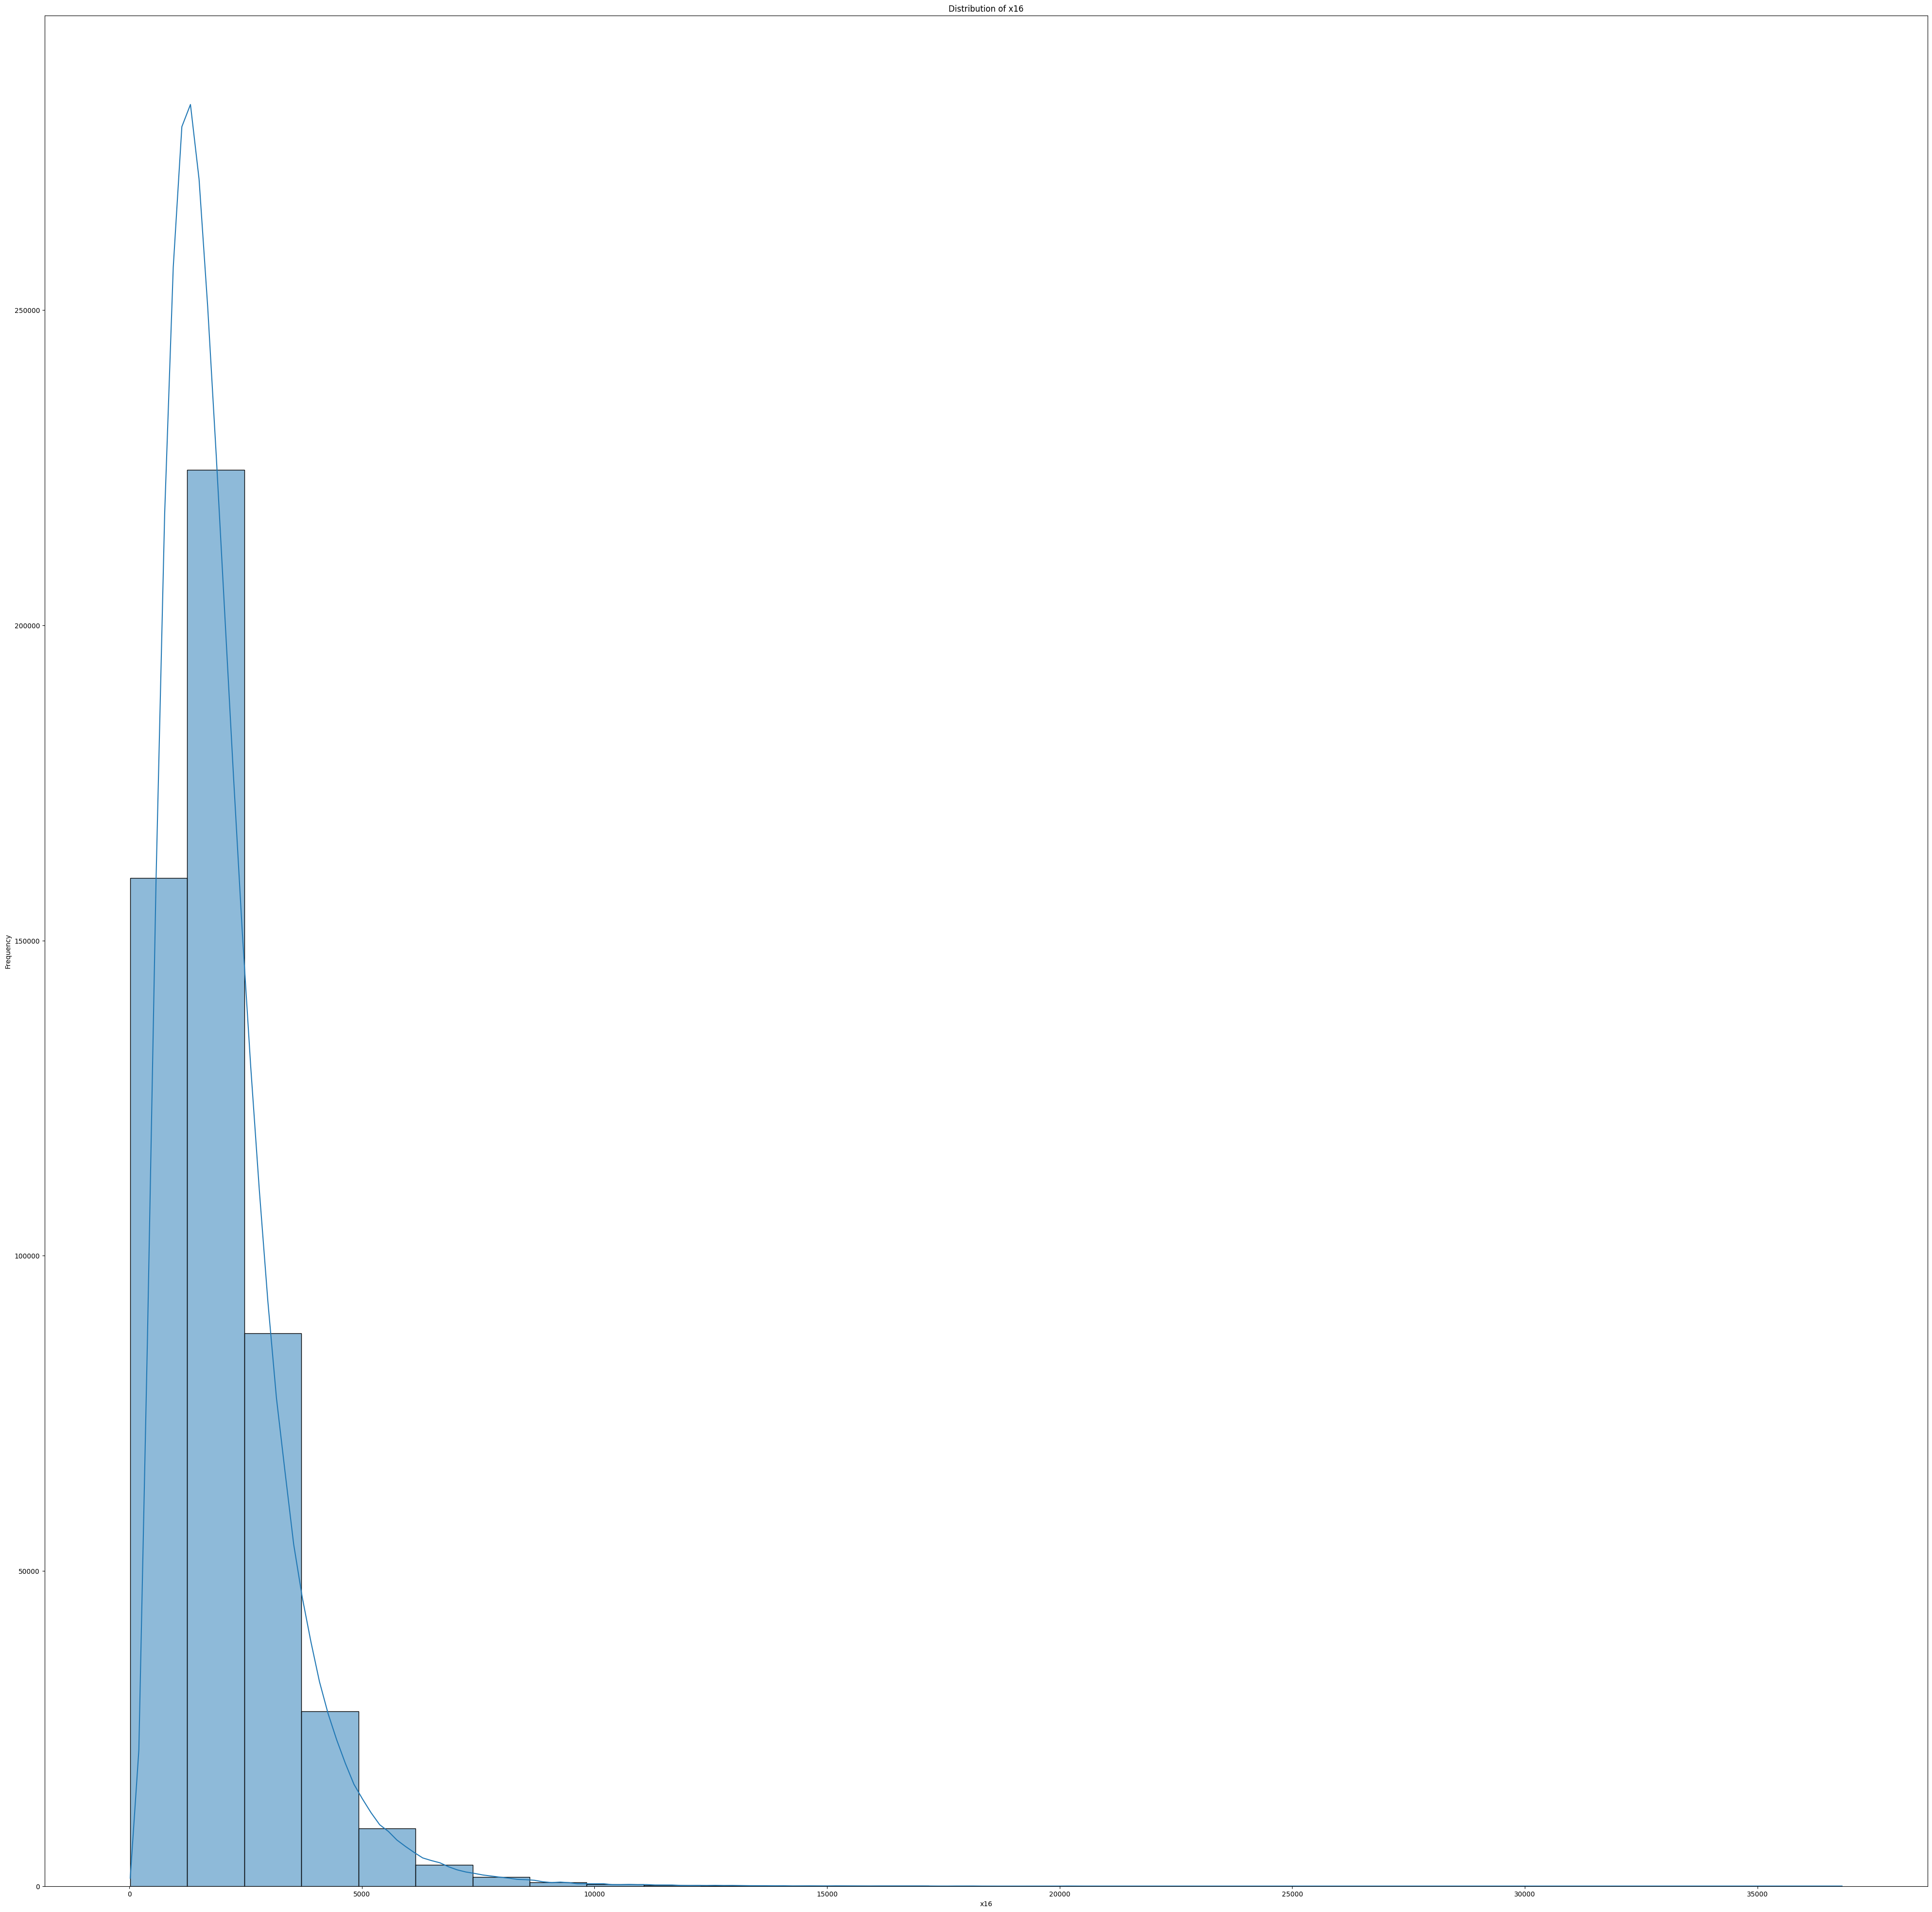

Target x16 berhasil dipisahkan dari dataset.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Heatmap Korelasi
plt.figure(figsize=(100, 100))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Analisis Korelasi untuk Target Kandidat
# Hitung rata-rata korelasi setiap kolom dengan kolom lainnya
correlation_with_features = corr_matrix.mean().sort_values(ascending=False)
print("Korelasi rata-rata tiap kolom (descending):")
print(correlation_with_features)

# Pilih target berdasarkan korelasi tinggi
# Kecuali kolom yang memiliki korelasi rata-rata tertinggi adalah diagonal (1.0) -> abaikan
best_target = correlation_with_features.index[1]  # Kolom kedua dengan korelasi rata-rata tertinggi
print(f"\nTarget terbaik berdasarkan korelasi: {best_target}")

# Step 4: Visualisasi Distribusi untuk Target Kandidat
plt.figure(figsize=(50, 50))
sns.histplot(data[best_target], kde=True, bins=30)
plt.title(f"Distribution of {best_target}")
plt.xlabel(best_target)
plt.ylabel("Frequency")
plt.show()

# Step 5: Simpan Target untuk Model
# Pisahkan target terbaik untuk keperluan preprocessing dan modeling
target = data[best_target]
features = data.drop(columns=[best_target])  # Sisakan fitur
print(f"Target {best_target} berhasil dipisahkan dari dataset.")


Kode ini digunakan untuk:
* Mengidentifikasi kolom target terbaik berdasarkan korelasi rata-rata.
* Memvisualisasikan pola distribusi target.
* Memisahkan target dan fitur untuk persiapan modeling.

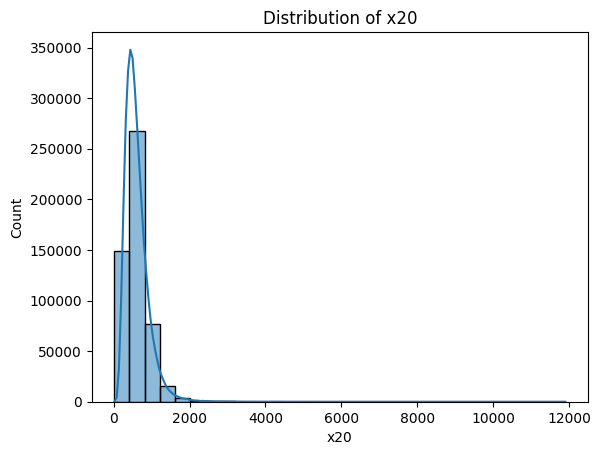

Top correlations for x20:
x20    1.000000
x25    0.636622
x22    0.613747
x18    0.583761
x16    0.573116
Name: x20, dtype: float64
Top correlations for x16:
x16    1.000000
x20    0.573116
x17    0.546272
x18    0.540751
x15    0.509197
Name: x16, dtype: float64


In [4]:
# Visualisasi distribusi x20
sns.histplot(data['x20'], kde=True, bins=30)
plt.title("Distribution of x20")
plt.show()

# Bandingkan korelasi individu
corr_x20 = data.corr()['x20'].sort_values(ascending=False)
corr_x16 = data.corr()['x16'].sort_values(ascending=False)

print("Top correlations for x20:")
print(corr_x20.head())

print("Top correlations for x16:")
print(corr_x16.head())


Membandingkan x20 dan x16, untuk memilih kolom yang lebih cocok menjadi target

Skewness of selected features:
x59    4.509817
x25    4.171231
x17    3.450552
x22    3.282881
x24    3.139370
x18    3.102166
x70    3.081391
x15    2.926484
x21    2.669199
x19    2.248183
x16    2.222589
x82    2.187247
x27    2.135956
x14    2.053497
x23    1.997408
x84    1.690431
x58    1.672820
x57    1.600030
x49    1.453634
x38    1.446716
x60    1.318739
x34    1.317343
x37    1.208685
x53    1.015764
x5     0.974935
x7     0.847077
x64    0.832127
x39    0.519972
x68    0.326706
x47    0.156771
x85    0.106303
x65    0.088794
x6     0.068055
x4    -0.153322
x12   -0.192997
x10   -0.256580
x32   -0.516467
x76   -0.662143
x51   -0.853309
x3    -0.860320
x2    -0.895507
x81   -1.002497
x48   -1.100411
x83   -1.365411
x77   -1.600170
x72   -2.069091
x56   -2.249678
x40   -2.454594
x44   -3.272473
x80   -4.338777
dtype: float64


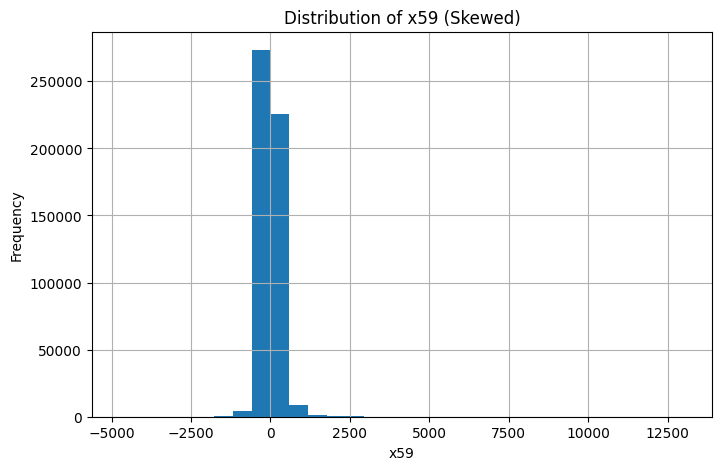

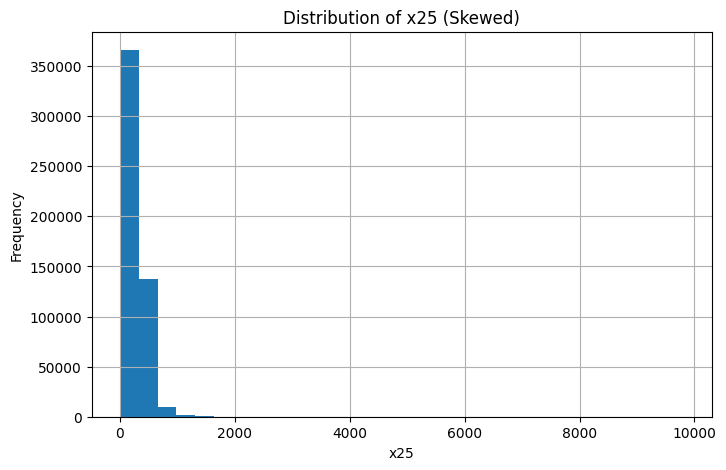

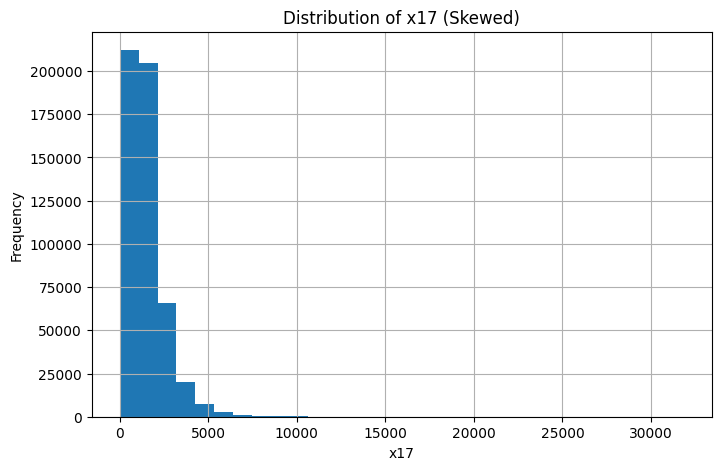

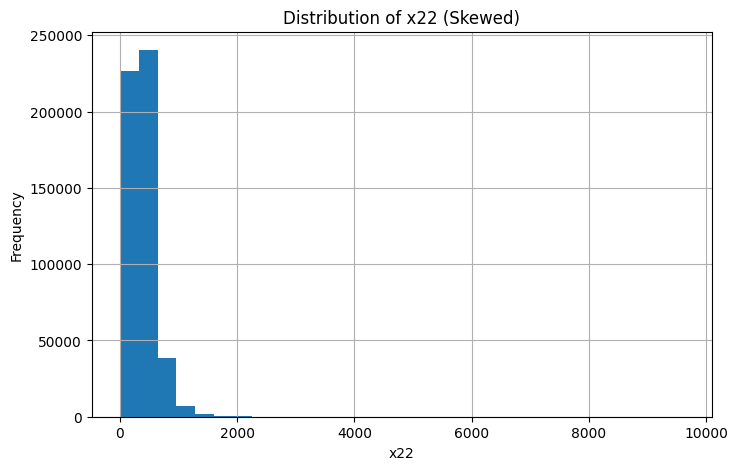

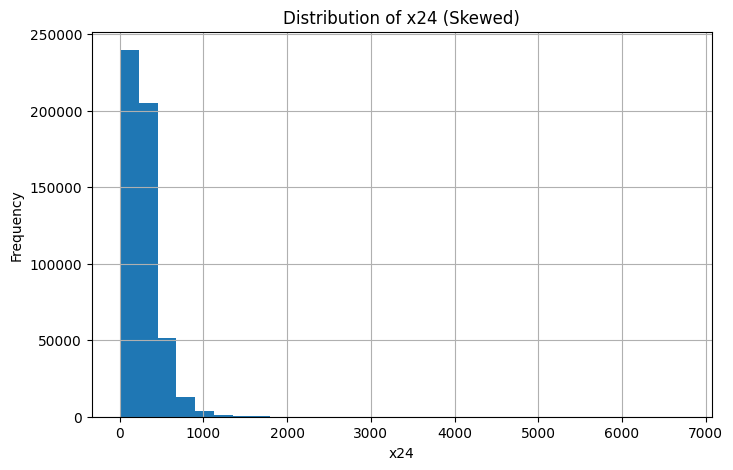

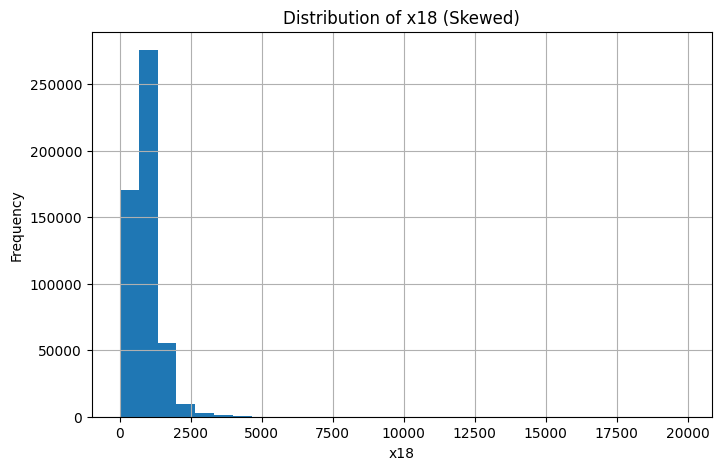

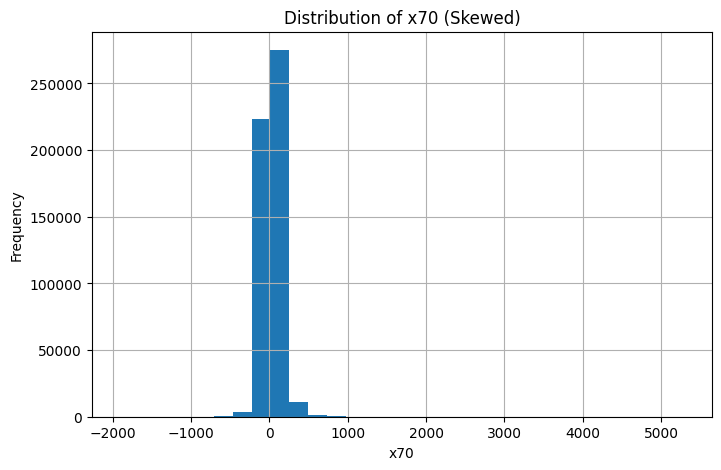

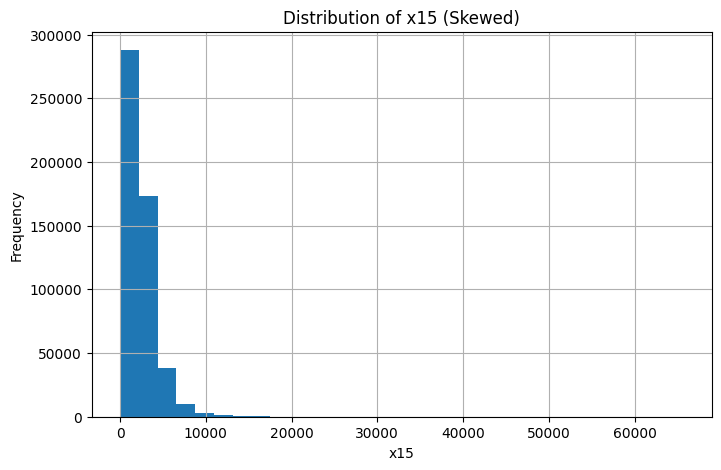

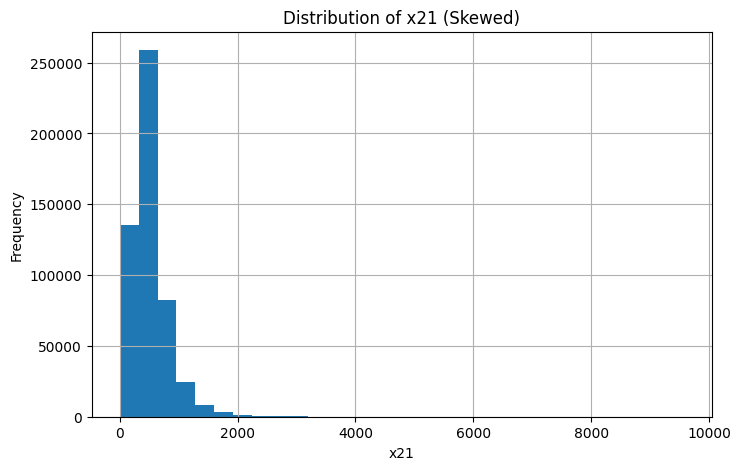

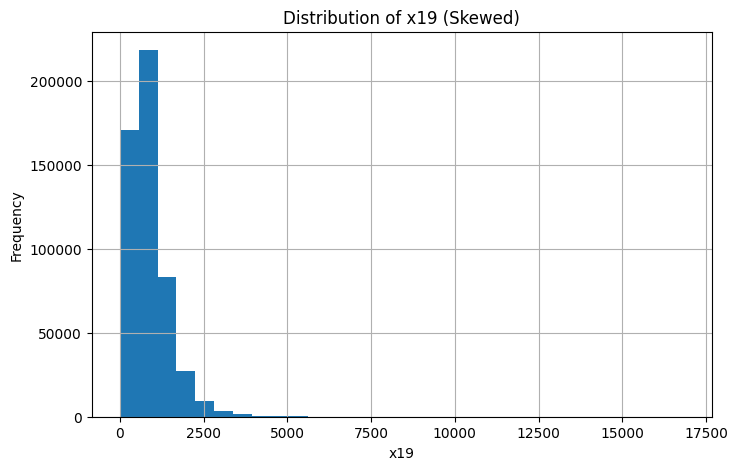

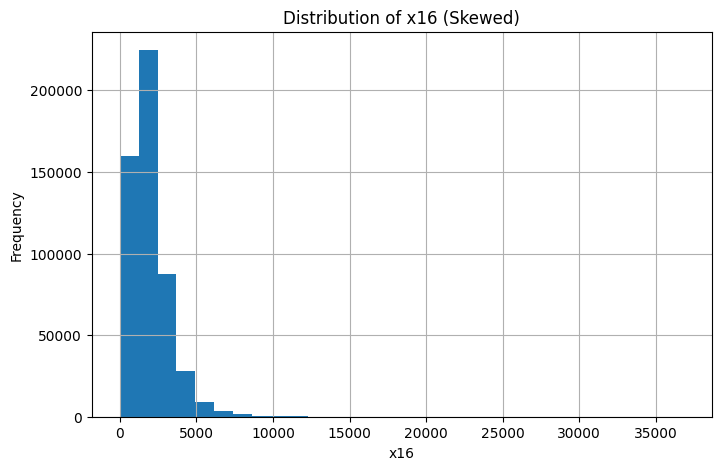

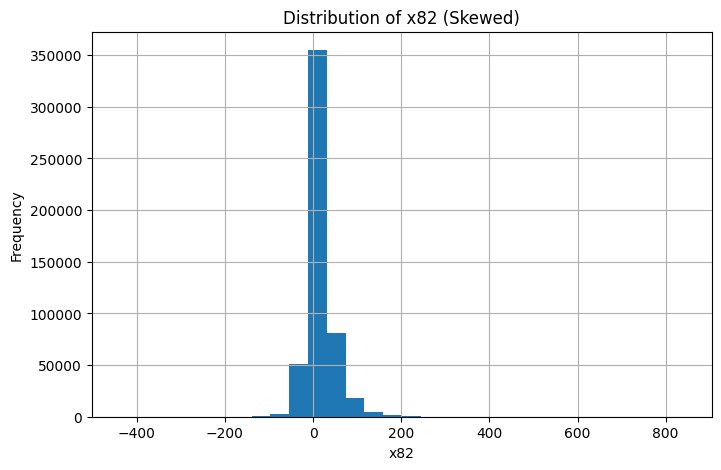

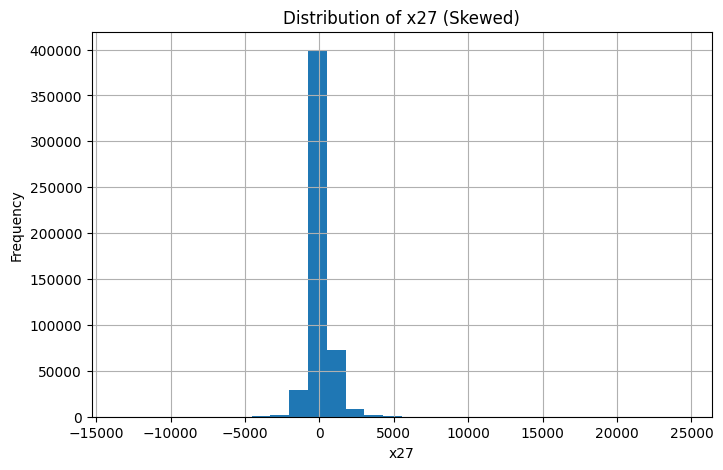

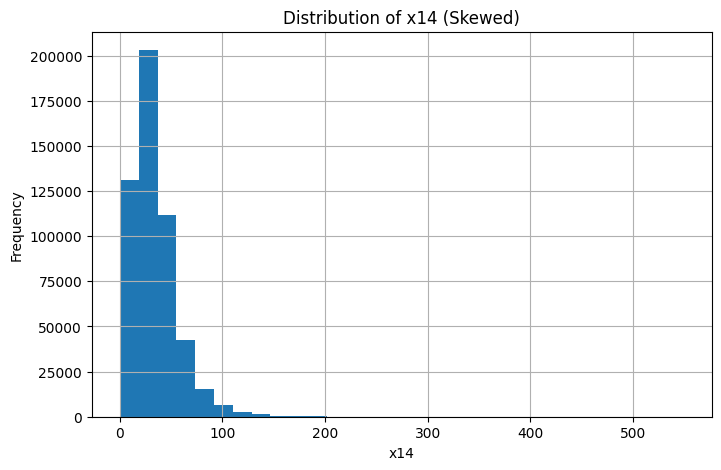

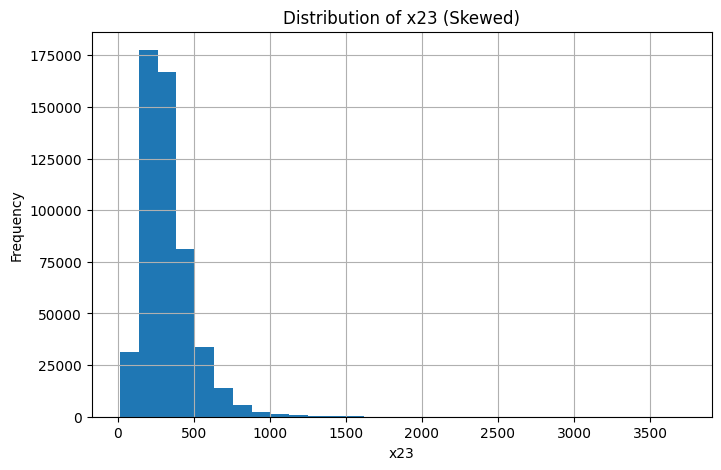

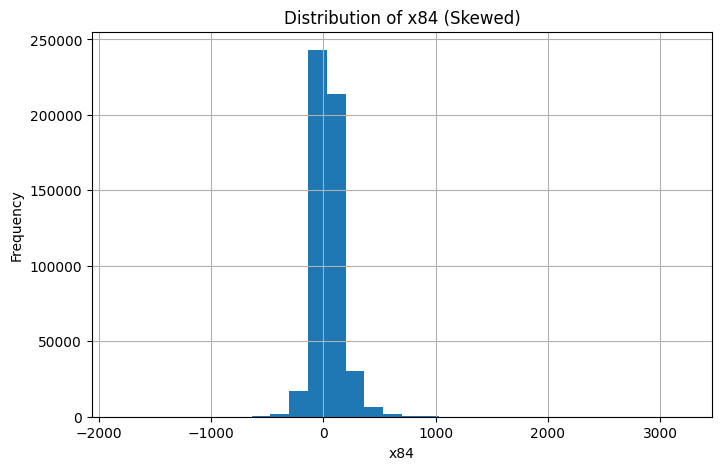

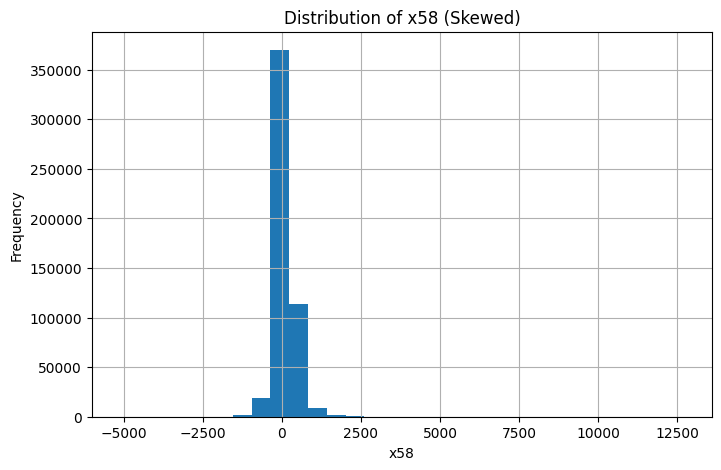

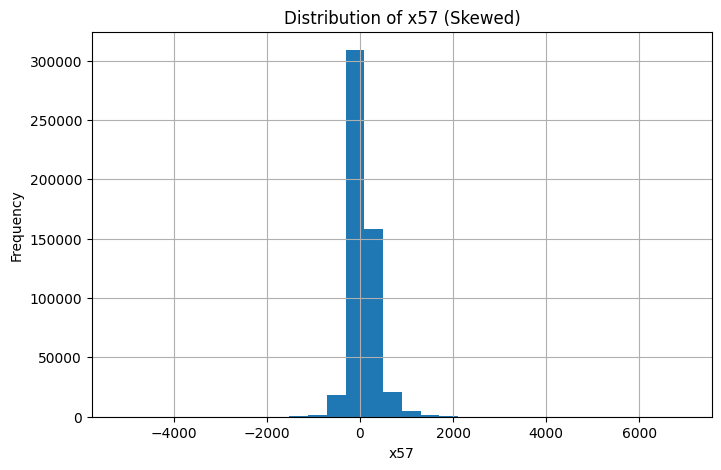

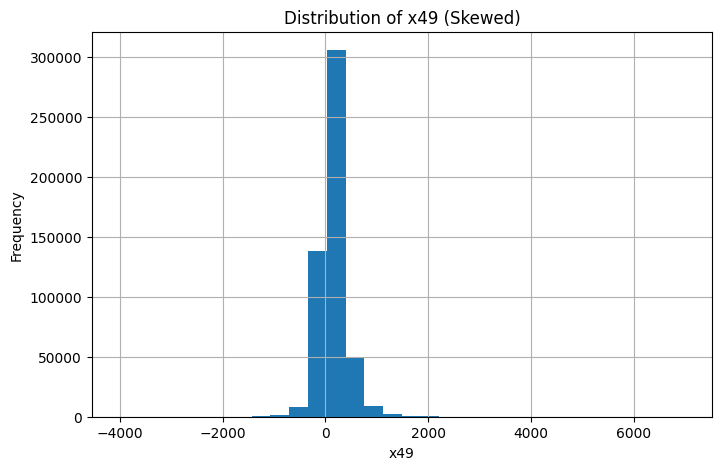

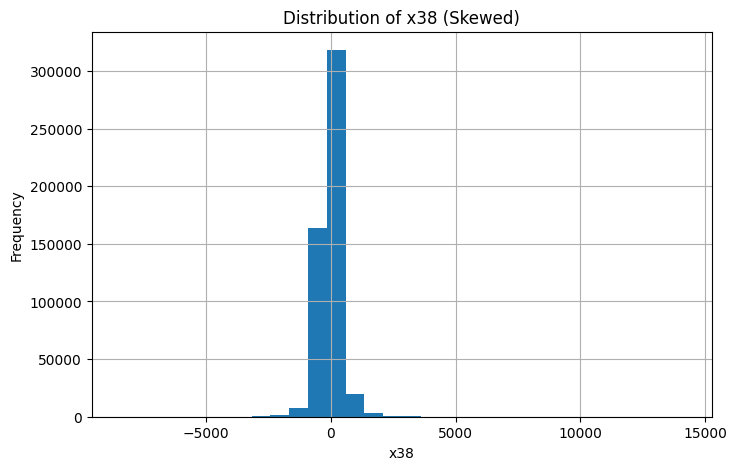

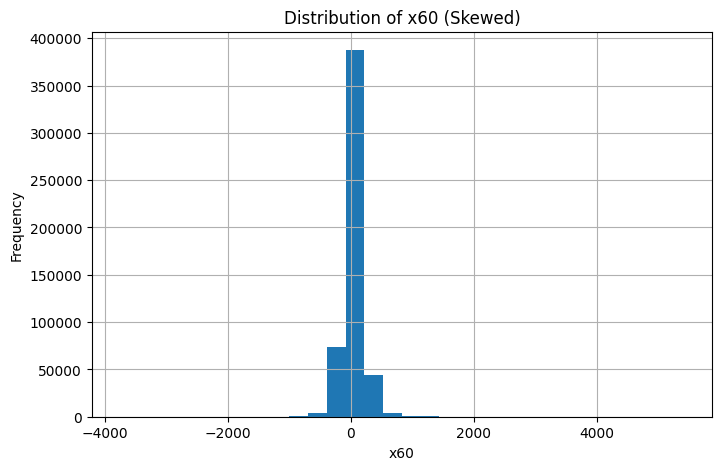

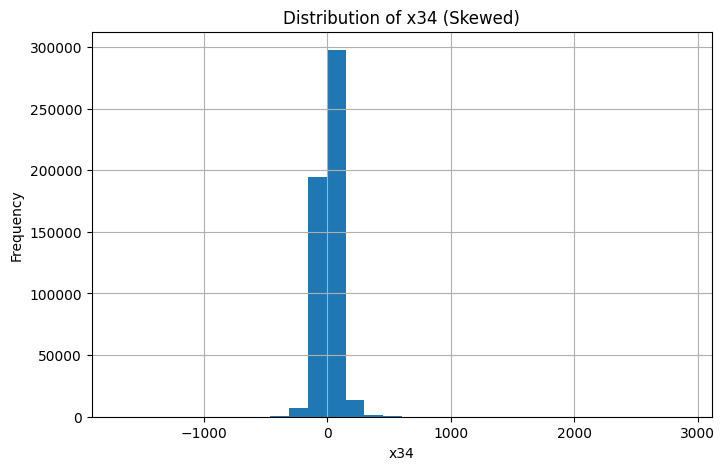

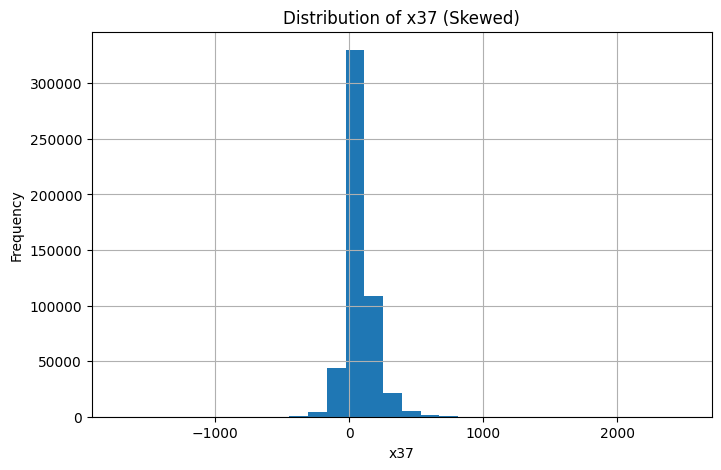

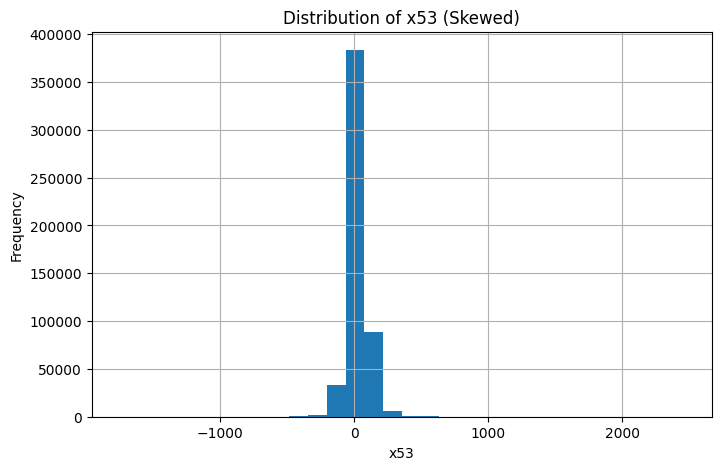

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Step 2: Transform target (log-transform x20)
data['x20_log'] = np.log1p(data['x20'])  # Transform target to reduce skewness
target = data['x20_log']
data = data.drop(columns=['x20', 'x20_log'])  # Drop original and transformed target for feature selection

# Step 3: Select features based on correlation with x20_log
correlation_threshold = 0.1
correlation_with_target = data.corrwith(target).abs()  # Compute absolute correlation
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index
data_selected = data[selected_features]

# Step 4: Apply Variance Threshold to selected features
variance_threshold = 0.1
selector = VarianceThreshold(threshold=variance_threshold)
data_high_variance = selector.fit_transform(data_selected)

# Convert back to DataFrame
data_final = pd.DataFrame(data_high_variance, columns=[col for col, keep in zip(data_selected.columns, selector.get_support()) if keep])

# Step 5: Calculate skewness of the selected features
skewness = data_final.skew().sort_values(ascending=False)
print("Skewness of selected features:")
print(skewness)

# Step 6: Visualize features with high skewness
import matplotlib.pyplot as plt
high_skewed_features = skewness[skewness > 1].index  # Select features with skewness > 1
for feature in high_skewed_features:
    plt.figure(figsize=(8, 5))
    data_final[feature].hist(bins=30)
    plt.title(f"Distribution of {feature} (Skewed)")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


In [13]:
import pandas as pd
import numpy as np

# Step 2: Drop duplicate rows
data = data.drop_duplicates()
print(f"Dataset shape after dropping duplicates: {data.shape}")

# Step 3: Transform target (log-transform x20)
data['x20_log'] = np.log1p(data['x20'])  # Transform target to reduce skewness
target = data['x20_log']
data = data.drop(columns=['x20', 'x20_log'])  # Drop original and transformed target for feature selection

# Step 4: Select features based on correlation with x20_log
correlation_threshold = 0.1
correlation_with_target = data.corrwith(target).abs()  # Compute absolute correlation
selected_features = correlation_with_target[correlation_with_target > correlation_threshold].index
data_selected = data[selected_features]

# Step 5: Apply Variance Threshold to selected features
from sklearn.feature_selection import VarianceThreshold

variance_threshold = 0.1
selector = VarianceThreshold(threshold=variance_threshold)
data_high_variance = selector.fit_transform(data_selected)

# Convert back to DataFrame
data_final = pd.DataFrame(data_high_variance, columns=[col for col, keep in zip(data_selected.columns, selector.get_support()) if keep])

# Step 6: Drop column with NaN skewness (x82)
if 'x82' in data_final.columns:
    print("Dropping column 'x82' due to NaN skewness.")
    data_final = data_final.drop(columns=['x82'])

# Step 7: Handle skewness
skewness = data_final.skew().sort_values(ascending=False)
print("Skewness before transformation:")
print(skewness)

# Apply log1p transform for skewed features (>1)
skewed_features = skewness[skewness > 1].index
if len(skewed_features) > 0:
    data_final[skewed_features] = data_final[skewed_features].apply(np.log1p)

# Apply negative log transform for highly negative skewed features (<-1)
neg_skewed_features = skewness[skewness < -1].index
if len(neg_skewed_features) > 0:
    data_final[neg_skewed_features] = data_final[neg_skewed_features].apply(lambda x: -np.log1p(-x) if all(x < 0) else x)

# Recalculate skewness after transformation
new_skewness = data_final.skew().sort_values(ascending=False)
print("Skewness after transformation:")
print(new_skewness)

# Step 8: Remove features that still have high skewness after transformation
high_skewed_features_after = new_skewness[(new_skewness > 1) | (new_skewness < -1)].index
if len(high_skewed_features_after) > 0:
    print(f"Dropping features with high skewness after transformation: {list(high_skewed_features_after)}")
    data_final = data_final.drop(columns=high_skewed_features_after)

# Step 10: Add the target column (x20_log) back to the dataset
data_final['x20_log'] = target.values[:data_final.shape[0]]

# Step 9: Drop any remaining NaN values in the dataset
data_final = data_final.dropna()
print(f"Dataset shape after dropping NaN values: {data_final.shape}")

# Step 11: Save the processed dataset
processed_file_path = "D:\\KULIAH\\SEMESTER 7\\MACHINE LEARNING\\RegresiUTSTelkom_final.csv"
data_final.to_csv(processed_file_path, index=False)

print("Final processed dataset saved as:", processed_file_path)


Dataset shape after dropping duplicates: (515130, 91)
Dropping column 'x82' due to NaN skewness.
Skewness before transformation:
x59    4.510444
x25    4.171404
x17    3.450913
x22    3.283011
x24    3.139351
x18    3.102336
x70    3.081634
x15    2.926859
x21    2.669088
x19    2.248271
x16    2.222596
x27    2.136054
x14    2.053276
x23    1.997108
x84    1.690973
x58    1.673140
x57    1.600399
x49    1.453871
x38    1.446828
x60    1.318823
x34    1.318001
x37    1.208768
x53    1.015985
x5     0.974358
x7     0.846846
x64    0.832200
x39    0.519905
x68    0.326747
x47    0.156928
x85    0.106440
x65    0.089468
x6     0.068126
x4    -0.153239
x12   -0.193047
x10   -0.256650
x32   -0.516374
x76   -0.661759
x51   -0.853213
x3    -0.860269
x2    -0.895416
x81   -1.002561
x48   -1.100670
x83   -1.365475
x77   -1.600167
x72   -2.069324
x56   -2.250034
x40   -2.454756
x44   -3.273497
x80   -4.339337
dtype: float64
Skewness after transformation:
x5     0.974358
x7     0.846846
x64    0.

Memilih Kolom yang berkorelasi tinggi dengan target, lalu memeriksa distribusinya dan melakukan transformasi, jika setelah transformasi hasilnya masih jelek maka kolom tersebut akan di drop, dan yang terakhir menyimpan data yang sudah dipreprocessing menjadi data baru.